In [3]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [4]:
data_dir = os.path.abspath('/Users/KRS228/data')

In [5]:
postmortem_matrix_fpath = os.path.join(data_dir, 
                            'postmortem/analysis/dsi_studio/',
                            'IC_subdivisions',
                            'whole_brain_ROIs_cg.txt')
#                            'regions_aud_striatal/', 
#                            'aud-striatal_ROIs_cg.txt')

In [73]:
mgh_matrix_fpath = os.path.join(data_dir, 
                            'mgh_dwi_760um/regions_IC',
                            'whole_brain_ROIs_cg.txt')

In [74]:
#matrix_fpath = postmortem_matrix_fpath
matrix_fpath = mgh_matrix_fpath

In [95]:
df = pd.read_csv(matrix_fpath, header=1, delimiter='\t')

In [96]:
# get rid of weird column at the end
df = df.drop(columns=df.columns[-1])

In [97]:
df.iloc[:,:]

,data,data.1,LL_IC,brachium_IC,commissure_IC,L_IC_central,L_IC_dorsal,L_IC_external,R_IC_central,R_IC_dorsal,R_IC_external
0,2108,LL_IC,0,184,104,50,10,256,176,74,200
1,396,brachium_IC,184,0,4,0,0,2,2,2,4
2,352,commissure_IC,104,4,0,6,4,20,2,36,0
3,168,L_IC_central,50,0,6,0,2,24,0,2,0
4,60,L_IC_dorsal,10,0,4,2,0,10,0,4,0
5,628,L_IC_external,256,2,20,24,10,0,2,0,0
6,516,R_IC_central,176,2,2,0,0,2,0,50,26
7,356,R_IC_dorsal,74,2,36,2,4,0,50,0,10
8,480,R_IC_external,200,4,0,0,0,0,26,10,0


In [98]:
# make df version without total streamlines, data.1 column
plot_df = df.iloc[:,2:]

In [99]:
# get the max value in the whole dataframe for scaling purposes
df_max = plot_df.to_numpy().max()

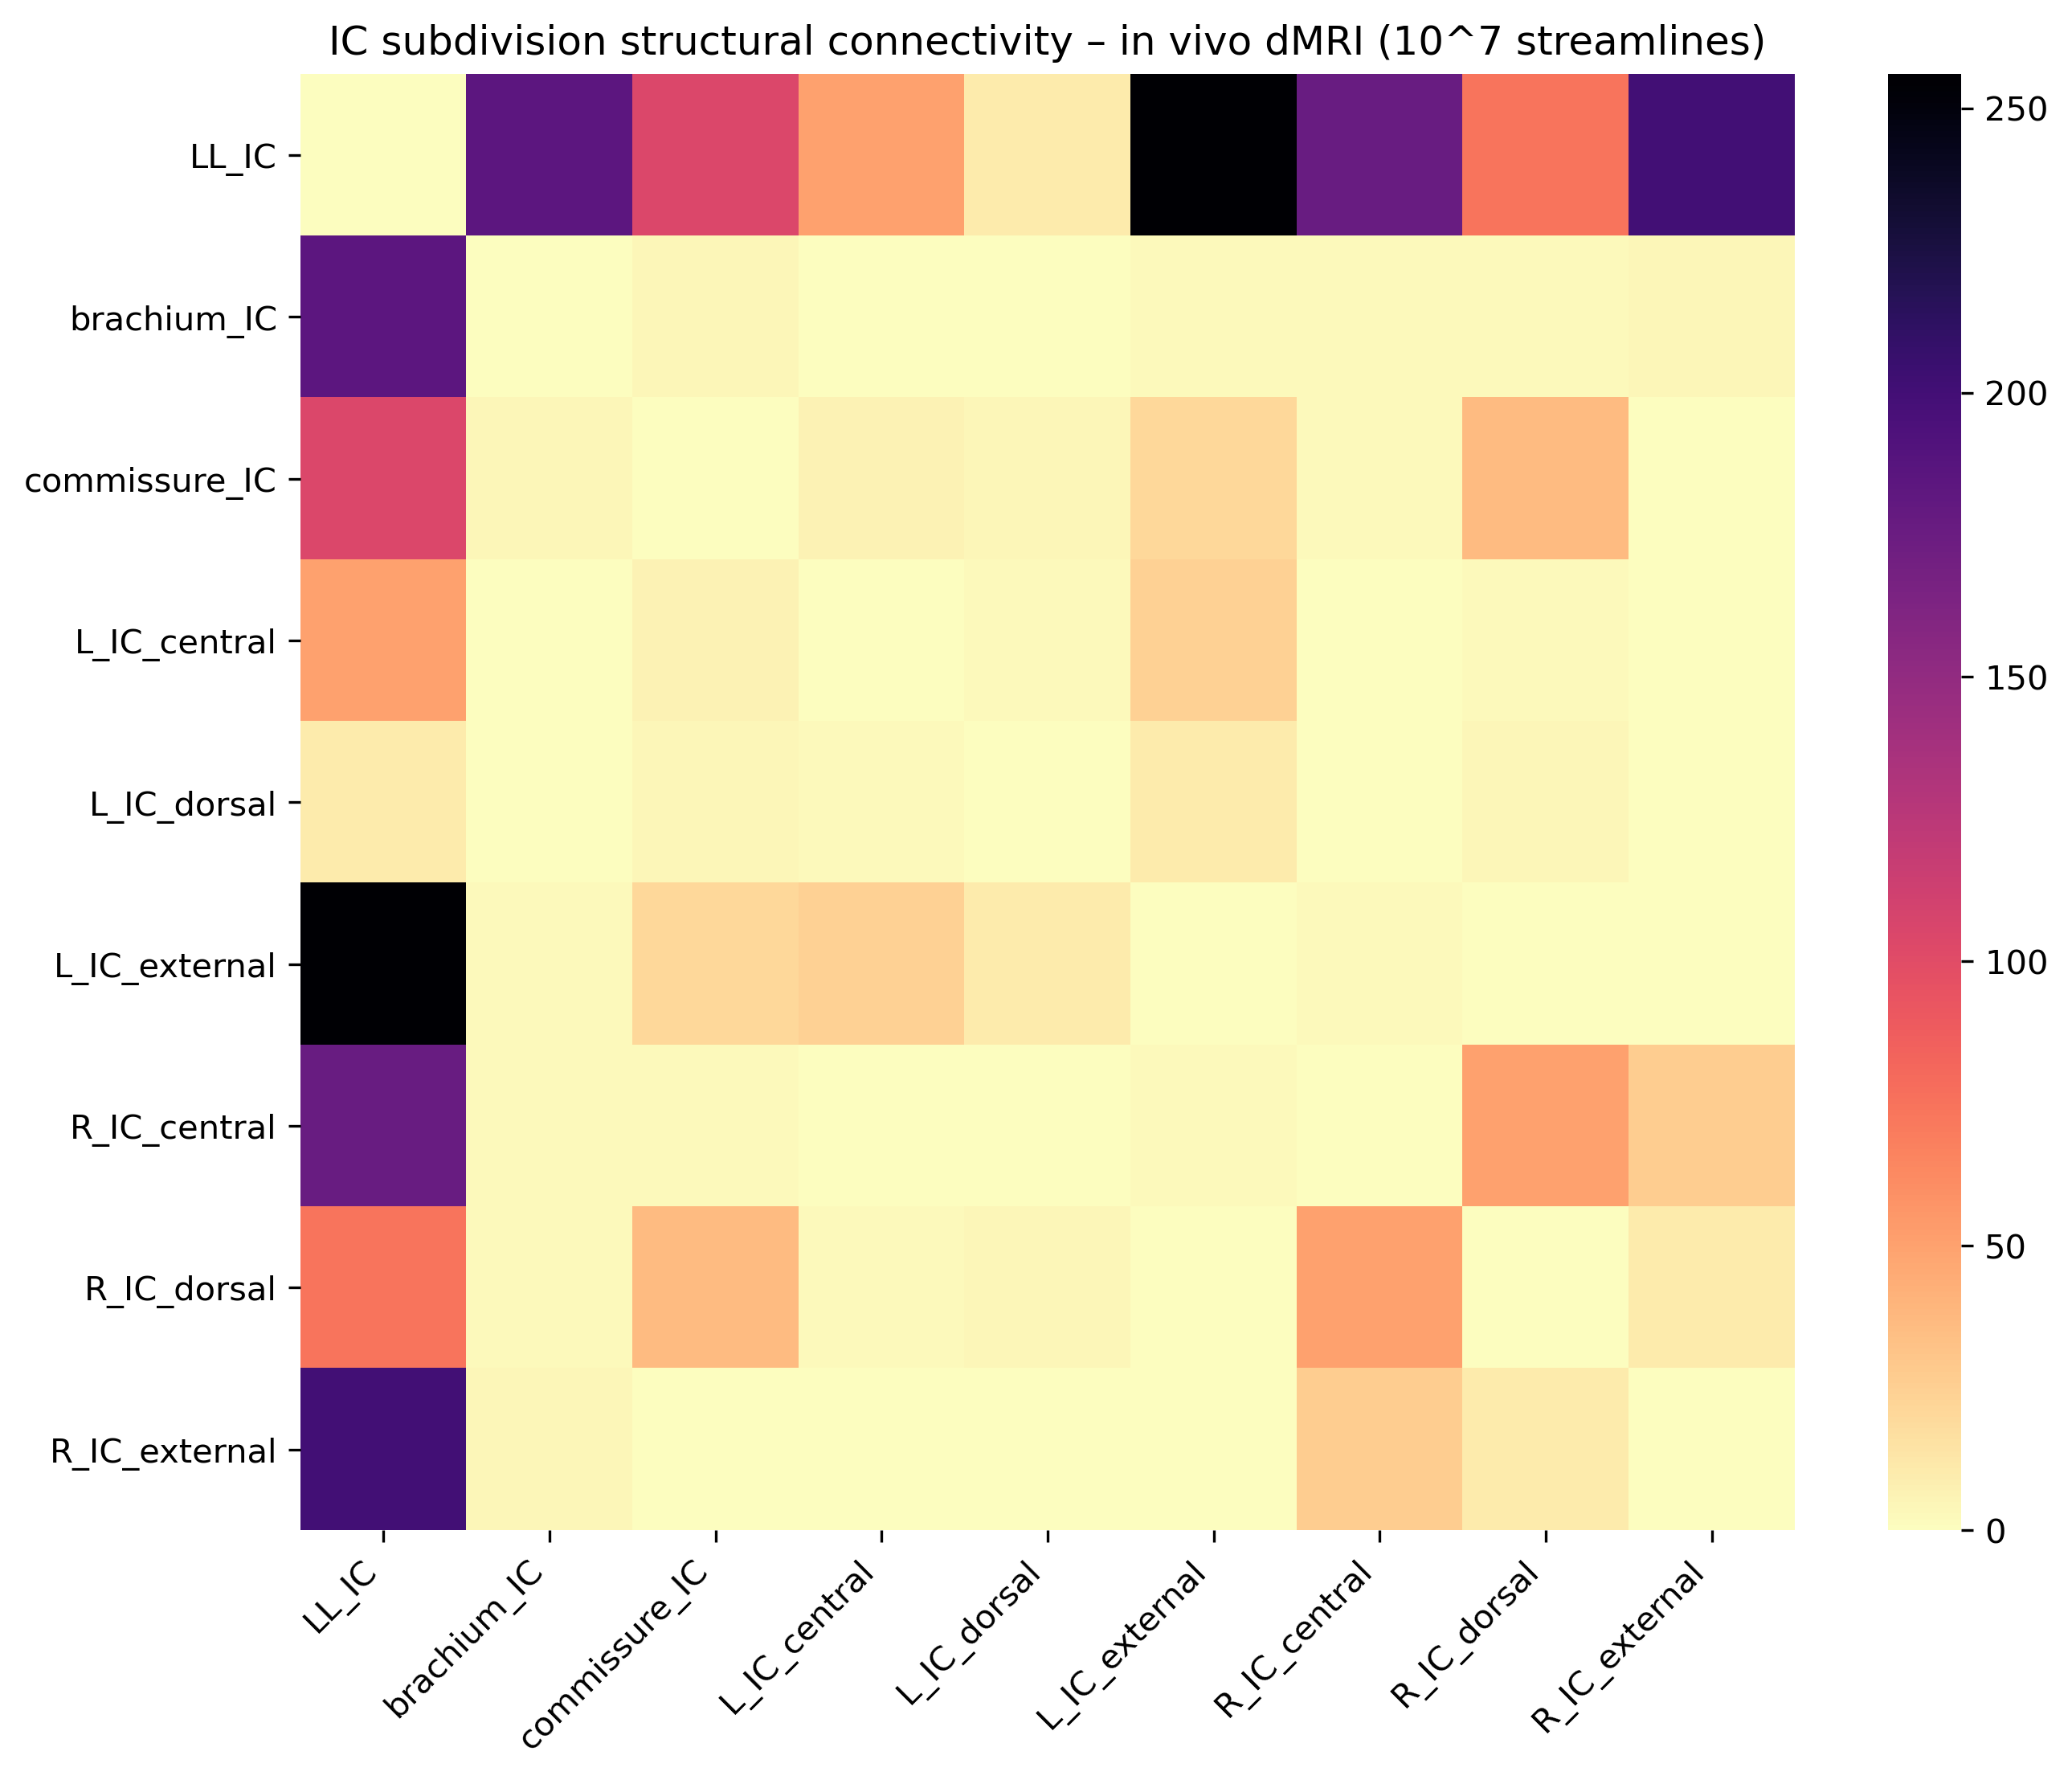

In [100]:
f, ax = plt.subplots(figsize=(10, 8), dpi=300)
sns.heatmap(plot_df, ax=ax, cmap="magma_r",
            xticklabels=plot_df, yticklabels=plot_df,  
            #norm=colors.LogNorm(vmin=1, vmax=df_max),
            #vmax=5000,
           )
#ax.set_title('IC subdivision structural connectivity – post mortem dMRI (10^7 streamlines)');
ax.set_title('IC subdivision structural connectivity – in vivo dMRI (10^7 streamlines)');
ax.set_xticklabels(plot_df, ha='right', rotation=45);


# save the figure
f.savefig('in vivo_IC_subdivision_conn_matrix.png')

## statistics

In [101]:
df

,data,data.1,LL_IC,brachium_IC,commissure_IC,L_IC_central,L_IC_dorsal,L_IC_external,R_IC_central,R_IC_dorsal,R_IC_external
0,2108,LL_IC,0,184,104,50,10,256,176,74,200
1,396,brachium_IC,184,0,4,0,0,2,2,2,4
2,352,commissure_IC,104,4,0,6,4,20,2,36,0
3,168,L_IC_central,50,0,6,0,2,24,0,2,0
4,60,L_IC_dorsal,10,0,4,2,0,10,0,4,0
5,628,L_IC_external,256,2,20,24,10,0,2,0,0
6,516,R_IC_central,176,2,2,0,0,2,0,50,26
7,356,R_IC_dorsal,74,2,36,2,4,0,50,0,10
8,480,R_IC_external,200,4,0,0,0,0,26,10,0


## plot values per WM region

In [102]:
norm_df = df.copy()
norm_df.iloc[:,2:] = norm_df.iloc[:,2:].div(norm_df['data'], axis=0)

In [103]:
norm_df

,data,data.1,LL_IC,brachium_IC,commissure_IC,L_IC_central,L_IC_dorsal,L_IC_external,R_IC_central,R_IC_dorsal,R_IC_external
0,2108,LL_IC,0.000000,0.087287,0.049336,0.023719,0.004744,0.121442,0.083491,0.035104,0.094877
1,396,brachium_IC,0.464646,0.000000,0.010101,0.000000,0.000000,0.005051,0.005051,0.005051,0.010101
2,352,commissure_IC,0.295455,0.011364,0.000000,0.017045,0.011364,0.056818,0.005682,0.102273,0.000000
3,168,L_IC_central,0.297619,0.000000,0.035714,0.000000,0.011905,0.142857,0.000000,0.011905,0.000000
4,60,L_IC_dorsal,0.166667,0.000000,0.066667,0.033333,0.000000,0.166667,0.000000,0.066667,0.000000
5,628,L_IC_external,0.407643,0.003185,0.031847,0.038217,0.015924,0.000000,0.003185,0.000000,0.000000
6,516,R_IC_central,0.341085,0.003876,0.003876,0.000000,0.000000,0.003876,0.000000,0.096899,0.050388
7,356,R_IC_dorsal,0.207865,0.005618,0.101124,0.005618,0.011236,0.000000,0.140449,0.000000,0.028090
8,480,R_IC_external,0.416667,0.008333,0.000000,0.000000,0.000000,0.000000,0.054167,0.020833,0.000000


In [104]:
col_list = norm_df['data.1']

In [105]:
l_mask = norm_df.columns.str.startswith('L_')
r_mask = norm_df.columns.str.startswith('R_')

In [106]:
left_df.index.str.startswith('L_')

array([False, False, False,  True,  True,  True, False, False, False])

In [107]:
left_df = norm_df.loc[:,l_mask]
left_df.set_index(col_list, inplace=True)

left_wm_df = left_df.loc[(left_df.index.str.startswith('LL_')) | 
                         (left_df.index.str.startswith('brachium_')) |
                         (left_df.index.str.startswith('commissure_'))]

# melt into a tall dataset
melt_left_df = left_wm_df.melt(var_name='ROI', value_name='streamline proportion', 
                                     ignore_index=False).reset_index()
melt_left_df.rename(columns={'data.1':'white matter seed'}, inplace=True)

In [108]:
melt_left_df

,white matter seed,ROI,streamline proportion
0,LL_IC,L_IC_central,0.023719
1,brachium_IC,L_IC_central,0.000000
2,commissure_IC,L_IC_central,0.017045
3,LL_IC,L_IC_dorsal,0.004744
4,brachium_IC,L_IC_dorsal,0.000000
5,commissure_IC,L_IC_dorsal,0.011364
6,LL_IC,L_IC_external,0.121442
7,brachium_IC,L_IC_external,0.005051
8,commissure_IC,L_IC_external,0.056818


In [109]:
right_df = norm_df.loc[:,r_mask]
right_df.set_index(col_list, inplace=True)

right_wm_df = right_df.loc[(left_df.index.str.startswith('LL_')) | 
                           (left_df.index.str.startswith('brachium_')) |
                           (left_df.index.str.startswith('commissure_'))]

# melt into a tall dataset
melt_right_df = right_wm_df.melt(var_name='ROI', value_name='streamline proportion', 
                                     ignore_index=False).reset_index()
melt_right_df.rename(columns={'data.1':'white matter seed'}, inplace=True)

In [110]:
# concatenate into a single tall dataset
melt_df = pd.concat([melt_left_df, melt_right_df])

In [111]:
melt_df

,white matter seed,ROI,streamline proportion
0,LL_IC,L_IC_central,0.023719
1,brachium_IC,L_IC_central,0.000000
2,commissure_IC,L_IC_central,0.017045
3,LL_IC,L_IC_dorsal,0.004744
4,brachium_IC,L_IC_dorsal,0.000000
5,commissure_IC,L_IC_dorsal,0.011364
6,LL_IC,L_IC_external,0.121442
7,brachium_IC,L_IC_external,0.005051
8,commissure_IC,L_IC_external,0.056818
0,LL_IC,R_IC_central,0.083491


In [112]:
# plot
f,axes=plt.subplots(1, 1, figsize=(8,8), dpi=1000)
sns.barplot(data=melt_df, x='ROI', y='streamline proportion', hue='white matter seed',ax=axes, palette='Set2')
axes.tick_params(rotation=45);
f.savefig('invivo_IC_subdivision_wm_barplot.png')

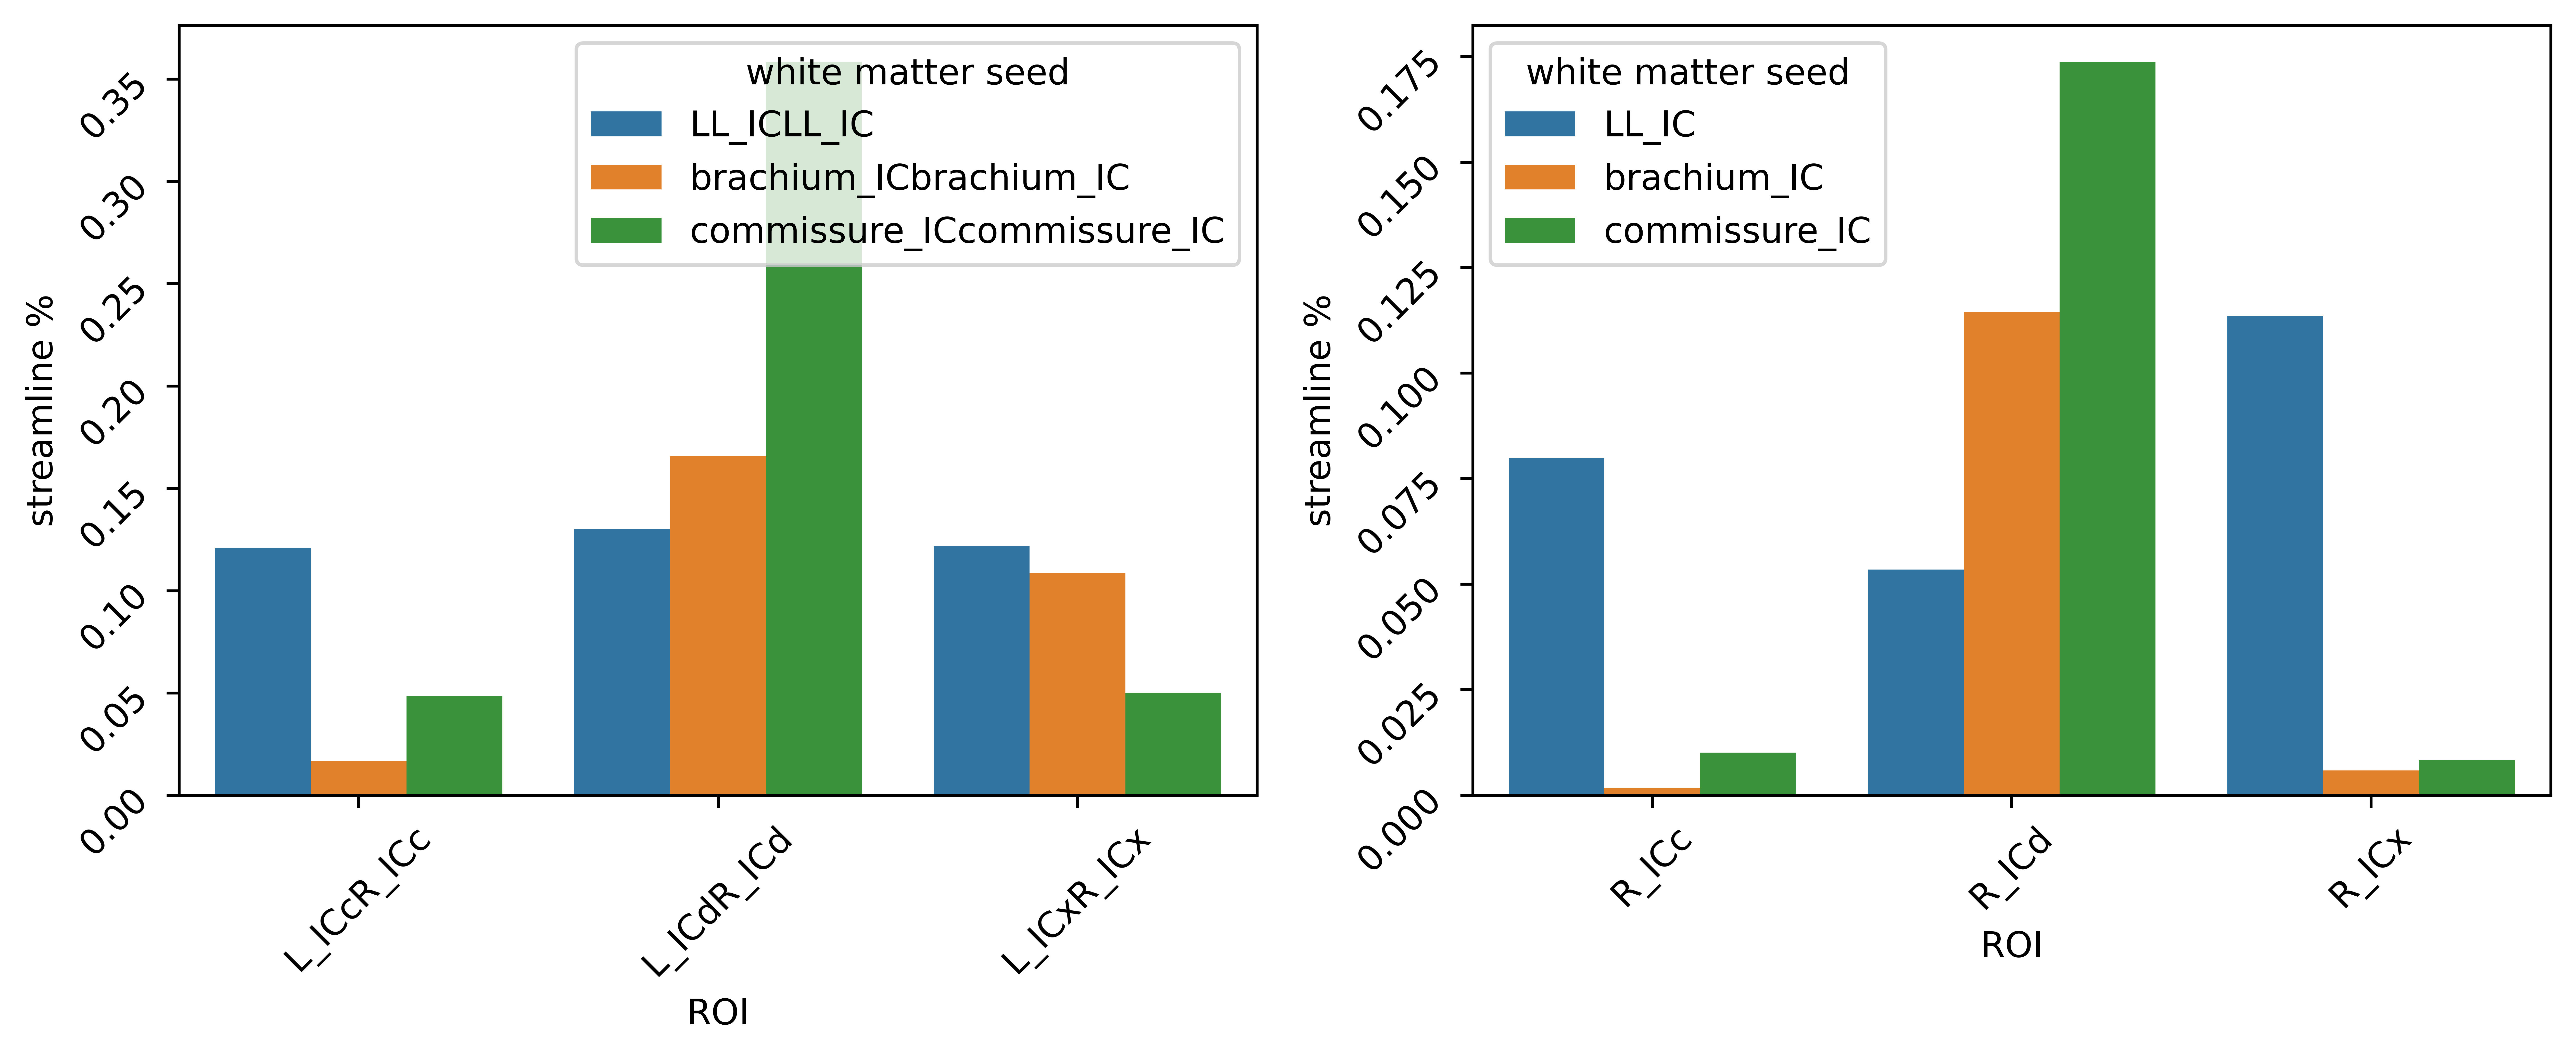

In [48]:
f,axes=plt.subplots(1, 2, figsize=(12,4), dpi=1000)
sns.barplot(data=melt_left_df, x='ROI', y='streamline %', hue='white matter seed',ax=axes[0])
axes[0].tick_params(rotation=45);

sns.barplot(data=melt_right_df, x='ROI', y='streamline %', hue='white matter seed',ax=axes[1])
axes[1].tick_params(rotation=45);


# MGH 760 um data

### try reading in with numpy

In [8]:
mat = np.genfromtxt(matrix_fpath, skip_header=1, names=True)

In [9]:
mat[0]

(5264., nan, 0., 928., 158., 1062., 14., 0., 0., 34., 310., 0., 112., 0., 0., 14., 0., 0.)

In [10]:
mat.dtype.names

('data',
 'data_1',
 'LeftCaudate',
 'LeftPutamen',
 'LeftPallidum',
 'RightCaudate',
 'RightPutamen',
 'RightPallidum',
 'ctx_lh_G_temp_supG_T_transv',
 'ctx_lh_G_temp_supLateral',
 'ctx_lh_G_temp_supPlan_polar',
 'ctx_lh_G_temp_supPlan_tempo',
 'ctx_lh_Pole_temporal',
 'ctx_rh_G_temp_supG_T_transv',
 'ctx_rh_G_temp_supLateral',
 'ctx_rh_G_temp_supPlan_polar',
 'ctx_rh_G_temp_supPlan_tempo',
 'ctx_rh_Pole_temporal')

ok, that kind of works... don't really want to work with an array of arrays though

### ok let's do pandas instead

In [39]:
df = pd.read_csv('regions_aud_striatal/aud-striatal_ROIs_cg.txt', header=1, delimiter='\t')

In [65]:
# get rid of weird column at the end
df = df.drop(columns='Unnamed: 48')

In [66]:
df.iloc[:,1:]

,data.1,R_A4,R_A5,R_STSvp,R_STSva,R_PBelt,R_STSda,R_STGa,R_TA2,R_STSdp,...,L_LBelt,L_TA2,L_STGa,L_STSva,L_STSdp,L_STSda,L_PBelt,L_STSvp,L_A5,L_A4
0,R_A4,0,10088,914,566,14876,1644,540,7372,5970,...,0,0,0,0,0,0,0,0,0,0
1,R_A5,10088,0,3340,878,6028,9112,1798,5588,12050,...,0,0,0,0,0,0,0,0,0,0
2,R_STSvp,914,3340,0,4476,878,184,102,10,12132,...,0,0,0,0,0,0,0,0,0,0
3,R_STSva,566,878,4476,0,738,3372,974,48,6436,...,0,0,0,0,0,0,0,0,0,0
4,R_PBelt,14876,6028,878,738,0,1646,380,614,6506,...,0,0,0,0,0,0,0,0,0,0
5,R_STSda,1644,9112,184,3372,1646,0,13890,5166,5230,...,0,0,0,0,0,0,0,0,0,0
6,R_STGa,540,1798,102,974,380,13890,0,12192,734,...,0,0,0,0,0,0,0,0,0,0
7,R_TA2,7372,5588,10,48,614,5166,12192,0,210,...,0,0,0,0,0,0,0,0,0,0
8,R_STSdp,5970,12050,12132,6436,6506,5230,734,210,0,...,0,0,0,0,0,0,0,0,0,0
9,R_LBelt,6400,5662,638,558,10378,1088,176,424,4330,...,0,0,0,2,0,0,0,0,0,0


In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [80]:
# get the max value in the whole dataframe for scaling purposes
df_max = df.iloc[:,2:].to_numpy().max()

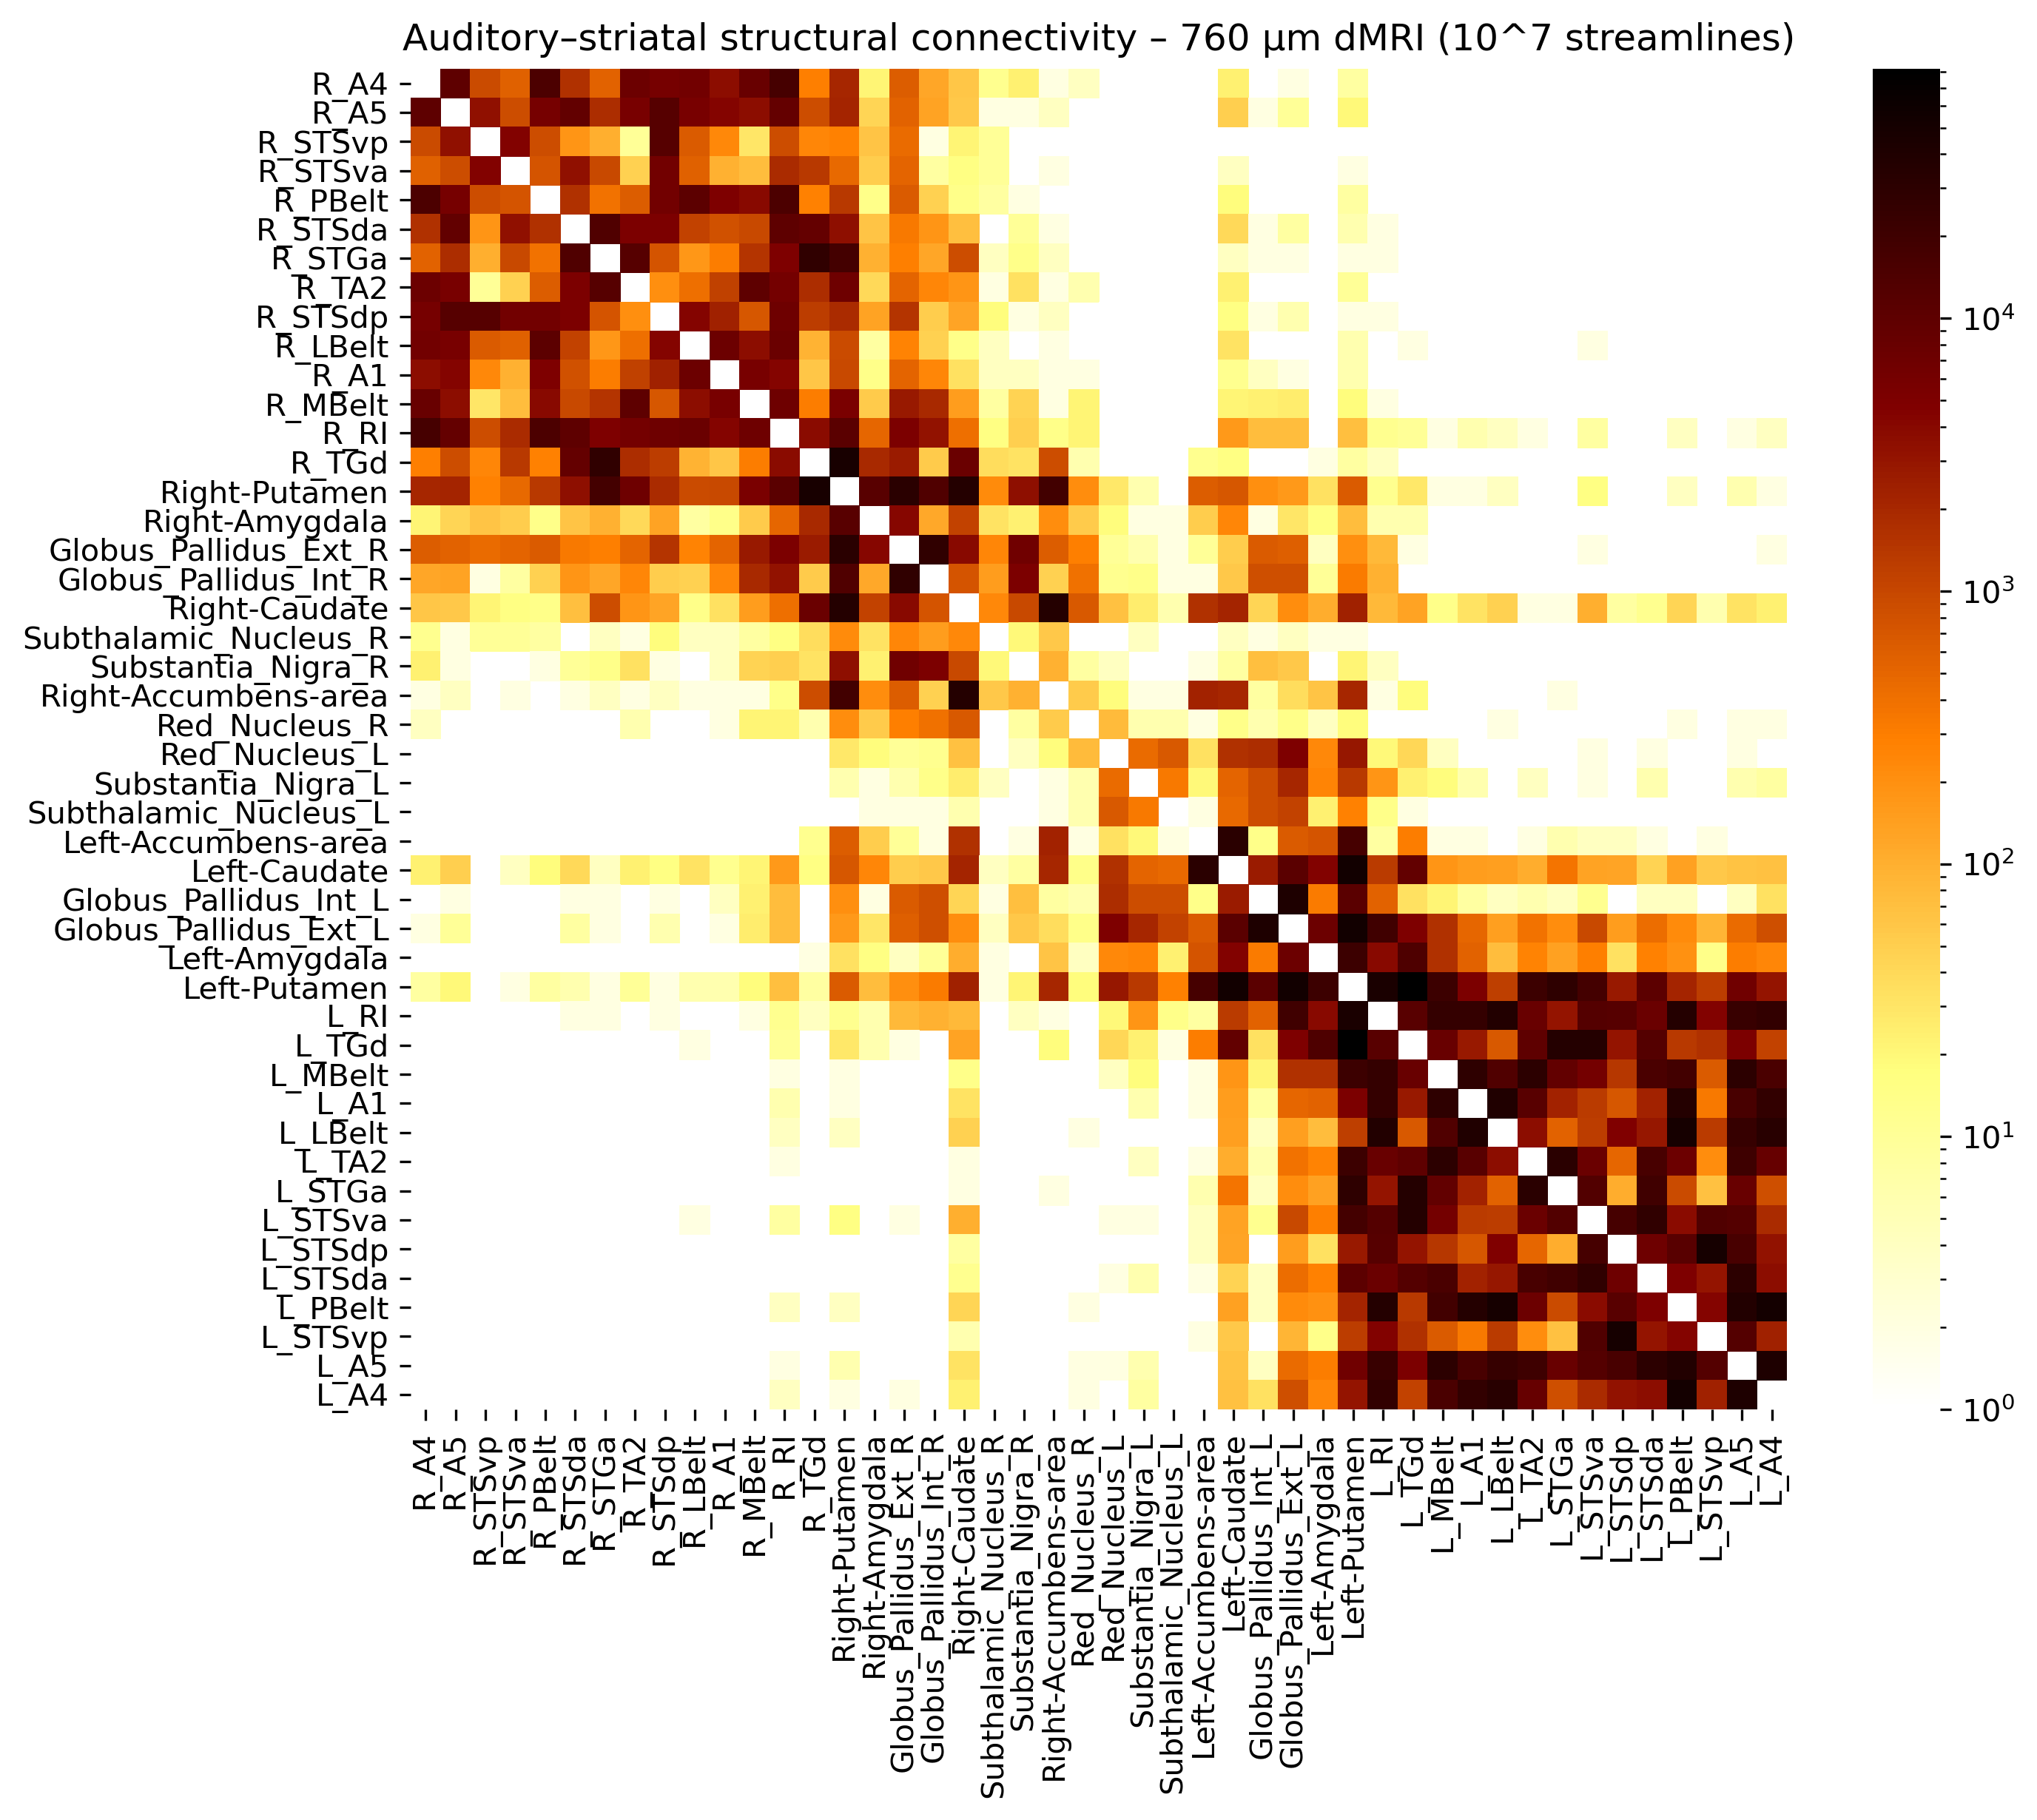

In [94]:
f, ax = plt.subplots(figsize=(10, 8), dpi=300)
sns.heatmap(df.iloc[:,2:], ax=ax, cmap="afmhot_r",
            xticklabels=df.columns[2:], yticklabels=df.columns[2:],  
            norm=colors.LogNorm(vmin=1, vmax=df_max))
ax.set_title('Auditory–striatal structural connectivity – 760 µm dMRI (10^7 streamlines)');

In [95]:
# save the figure
f.savefig('aud-striatal_conn_matrix.png')